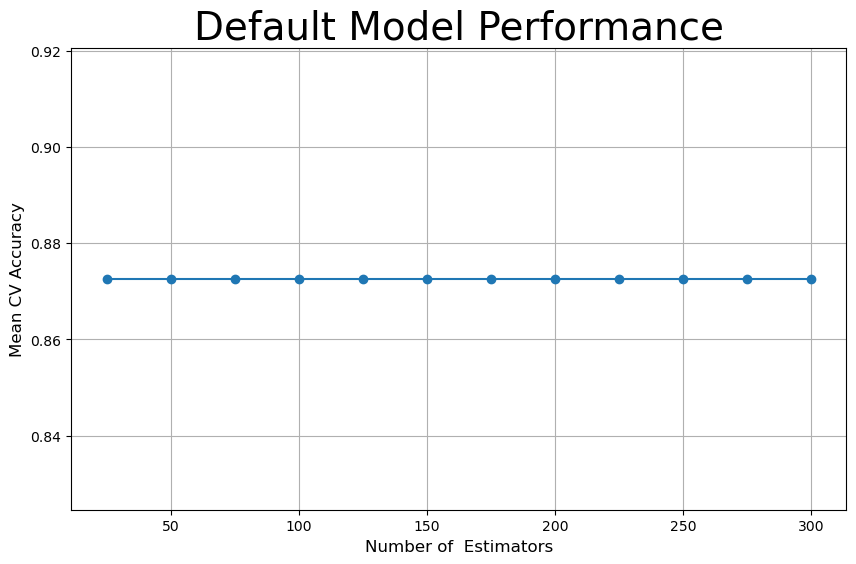

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('./data_reduced.csv')

# 언더샘플링
Training_data_0 = data[data['Bankrupt?'] == 0].sample(300, random_state=41)
Training_data_1 = data[data['Bankrupt?'] == 1]
Undersample_data = pd.concat([Training_data_0, Training_data_1]).sample(frac=1, random_state=41).reset_index(drop=True)

# 특성과 타겟 변수 분리
data_input = Undersample_data.drop(columns=['Bankrupt?'])
data_target = Undersample_data['Bankrupt?']

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, test_size=0.2, random_state=42)

# 하이퍼파라미터 없을 때 모델 성능 평가
n_estimators_range = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
cv_scores = []

for n_estimators in n_estimators_range:
    model = RandomForestClassifier(random_state=42)
    scores = cross_val_score(model, train_input, train_target, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

# 성능 시각화
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, cv_scores, marker='o')
plt.title('Default Model Performance', fontsize=28)
plt.xlabel('Number of  Estimators', fontsize=12)
plt.ylabel('Mean CV Accuracy', fontsize=12)
plt.grid(True)
plt.show()


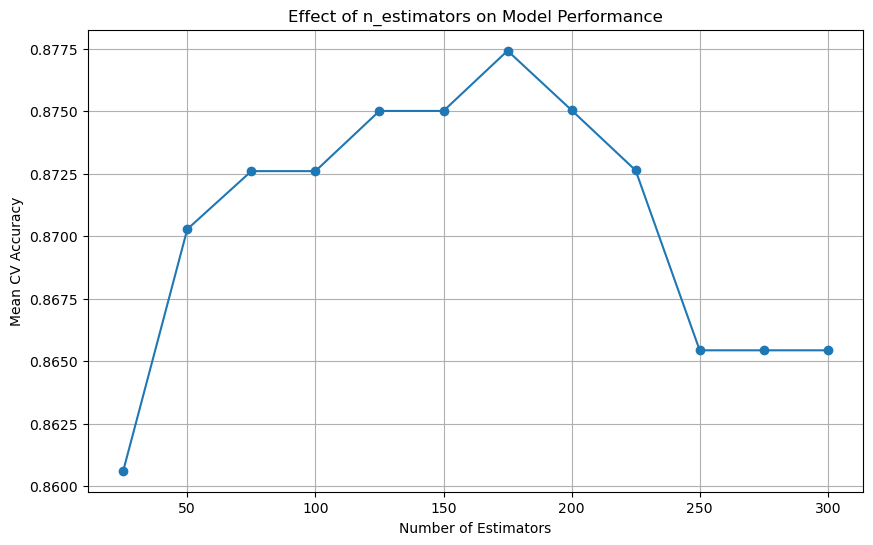

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('./data_reduced.csv')

# 언더샘플링
Training_data_0 = data[data['Bankrupt?'] == 0].sample(300, random_state=41)
Training_data_1 = data[data['Bankrupt?'] == 1]
Undersample_data = pd.concat([Training_data_0, Training_data_1]).sample(frac=1, random_state=41).reset_index(drop=True)

# 특성과 타겟 변수 분리
data_input = Undersample_data.drop(columns=['Bankrupt?'])
data_target = Undersample_data['Bankrupt?']

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, test_size=0.2, random_state=42)

# 하이퍼파라미터 n_estimators의 다양한 값에 대해 모델 성능 평가
n_estimators_range = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
cv_scores = []

for n_estimators in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(model, train_input, train_target, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

# 성능 시각화
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, cv_scores, marker='o')
plt.title('Effect of n_estimators on Model Performance')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.show()


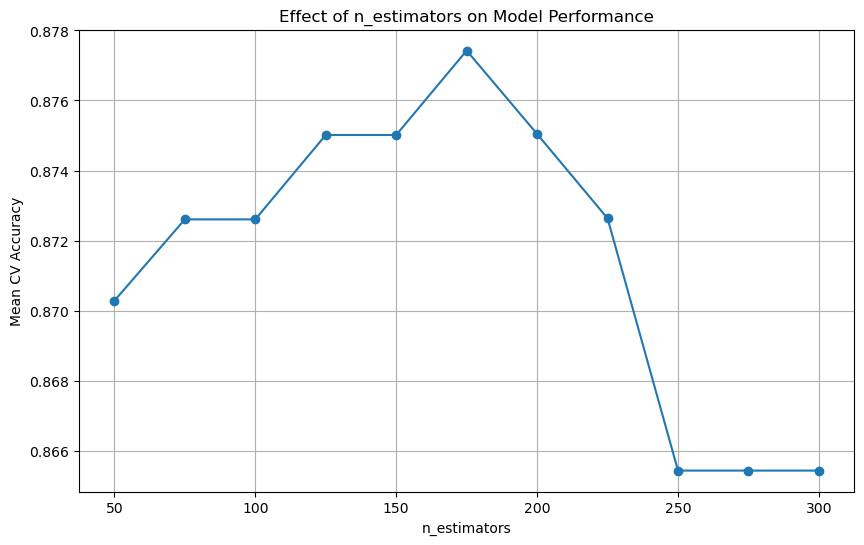

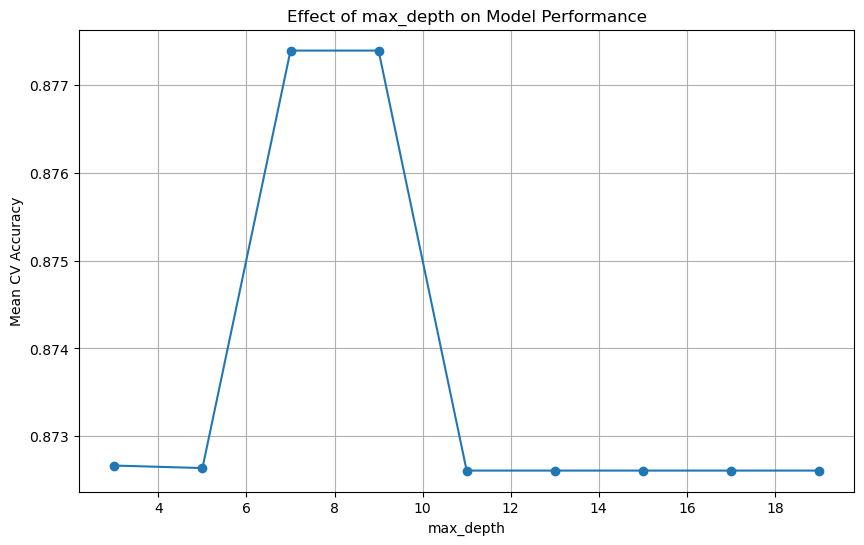

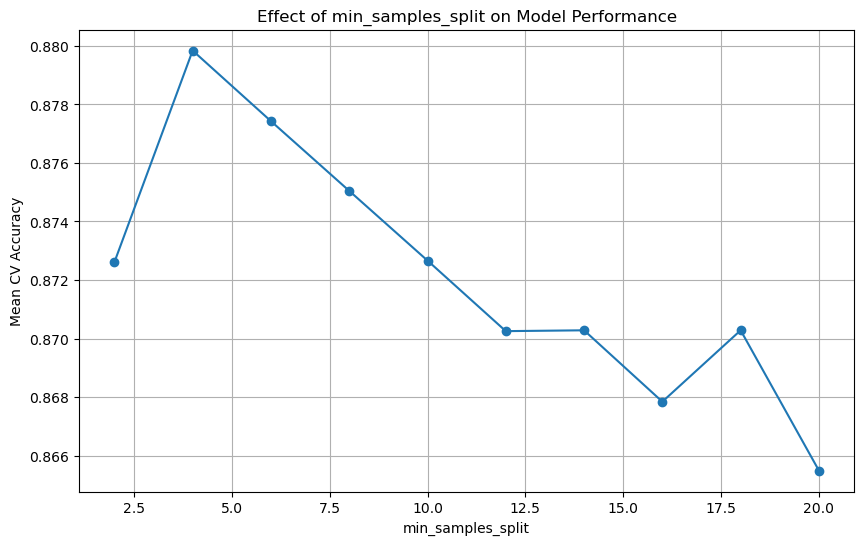

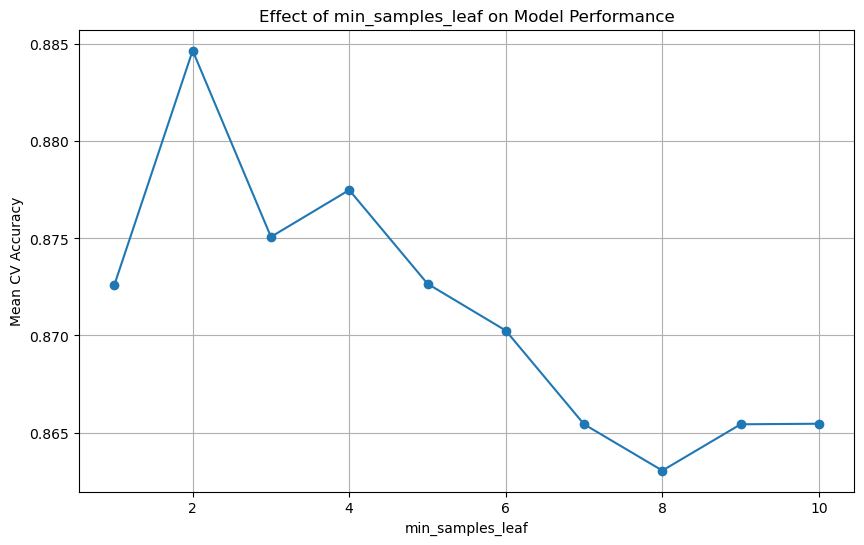

In [5]:
# 하이퍼파라미터 값 범위 설정
n_estimators_range = list(range(50, 301, 25))
max_depth_range = list(range(3, 21, 2))
min_samples_split_range = list(range(2, 21, 2))
min_samples_leaf_range = list(range(1, 11, 1))

def plot_hyperparameter_tuning(hyperparameter_name, param_range):
    cv_scores = []

    for param in param_range:
        model_params = {hyperparameter_name: param}
        model = RandomForestClassifier(random_state=42, **model_params)
        scores = cross_val_score(model, train_input, train_target, cv=5, scoring='accuracy')
        cv_scores.append(np.mean(scores))

    # 성능 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(param_range, cv_scores, marker='o')
    plt.title(f'Effect of {hyperparameter_name} on Model Performance')
    plt.xlabel(hyperparameter_name)
    plt.ylabel('Mean CV Accuracy')
    plt.grid(True)
    plt.show()

# n_estimators 성능 시각화
plot_hyperparameter_tuning('n_estimators', n_estimators_range)

# max_depth 성능 시각화
plot_hyperparameter_tuning('max_depth', max_depth_range)

# min_samples_split 성능 시각화
plot_hyperparameter_tuning('min_samples_split', min_samples_split_range)

# min_samples_leaf 성능 시각화
plot_hyperparameter_tuning('min_samples_leaf', min_samples_leaf_range)

최적의 하이퍼파라미터 조합: {'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


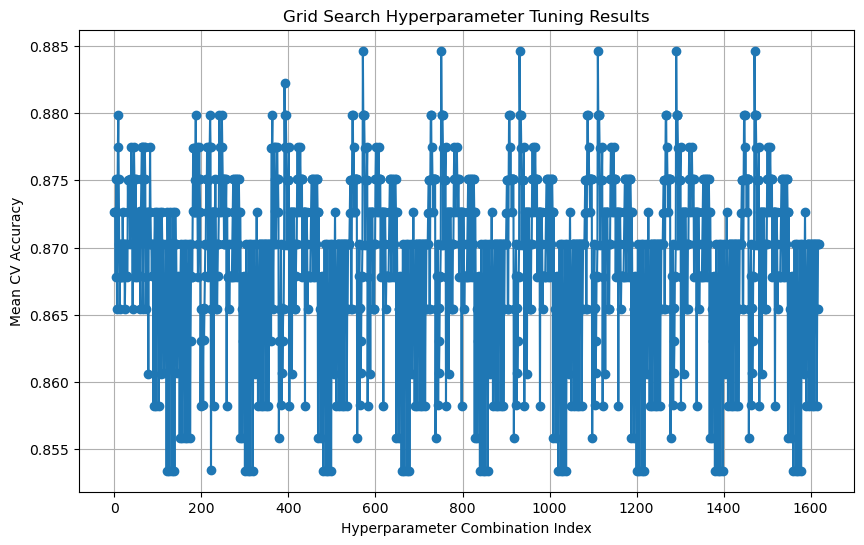

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt


# 하이퍼파라미터 값 범위 설정
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [5, 7, 9, 11, 13, 15, 17, 19, 21],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

# 그리드 서치 설정
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy')

# 그리드 서치 수행
grid_search.fit(train_input, train_target)

# 최적의 모델
best_rf_model = grid_search.best_estimator_

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f'최적의 하이퍼파라미터 조합: {best_params}')

# 예측 (최적 하이퍼파라미터)
train_predictions_tuned = best_rf_model.predict(train_input)
test_predictions_tuned = best_rf_model.predict(test_input)

# 모델 평가 - 정확도 (최적 하이퍼파라미터)
train_accuracy_tuned = accuracy_score(train_target, train_predictions_tuned)
test_accuracy_tuned = accuracy_score(test_target, test_predictions_tuned)

# 평가 지표 계산
accuracy = accuracy_score(test_target, test_predictions_tuned)
precision = precision_score(test_target, test_predictions_tuned)
recall = recall_score(test_target, test_predictions_tuned)
f1 = f1_score(test_target, test_predictions_tuned)

# 교차 검증 결과 시각화
cv_results = grid_search.cv_results_
mean_test_scores = cv_results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(mean_test_scores, marker='o')
plt.title('Grid Search Hyperparameter Tuning Results')
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.show()

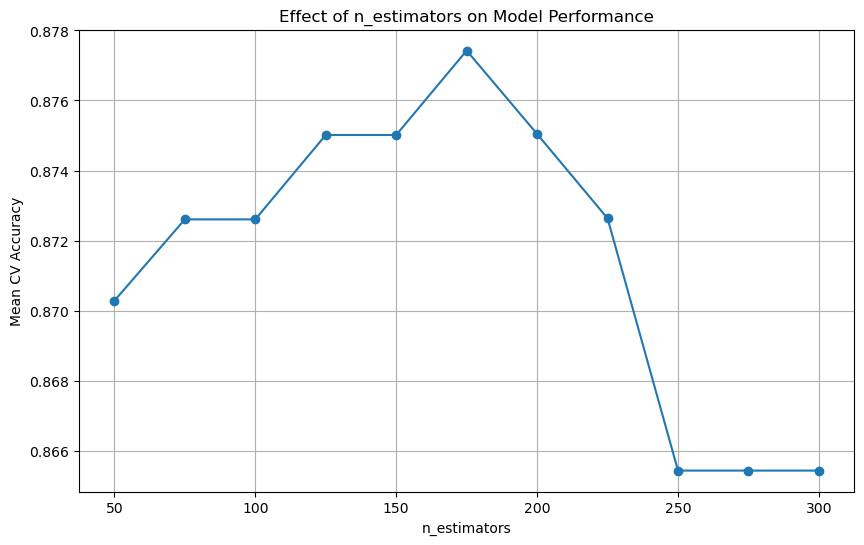

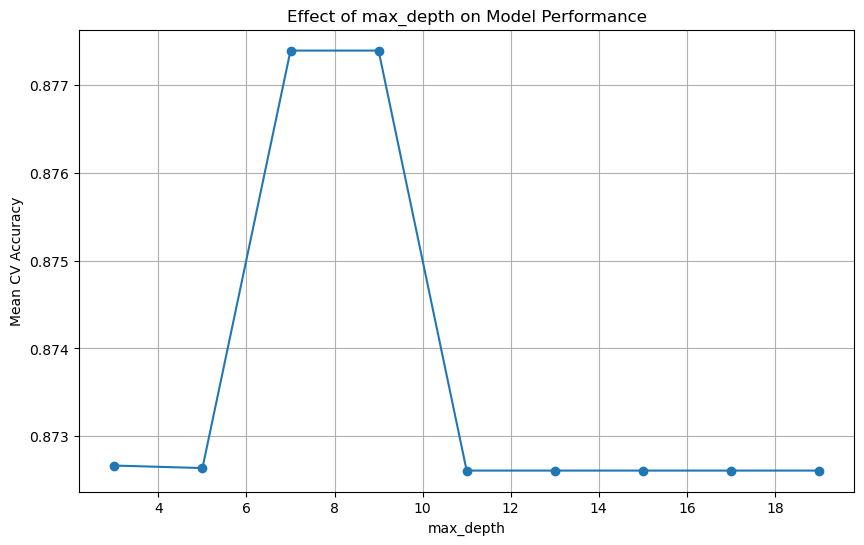

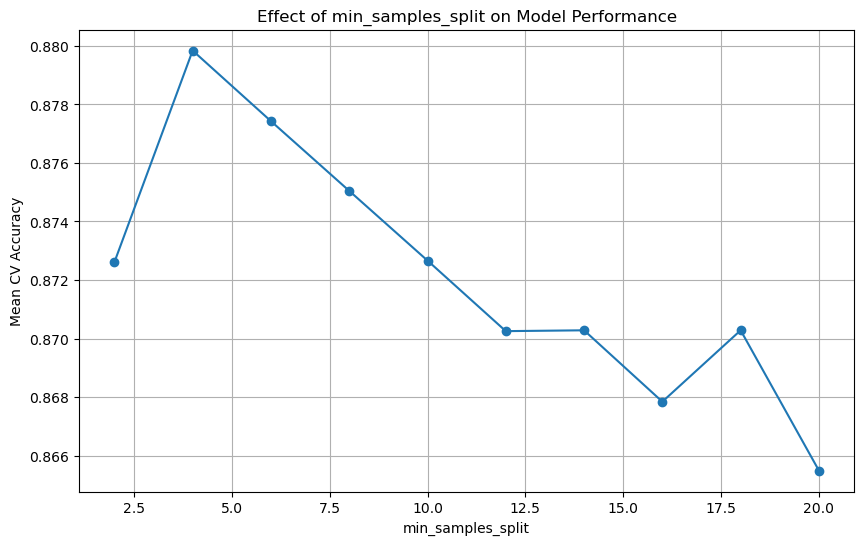

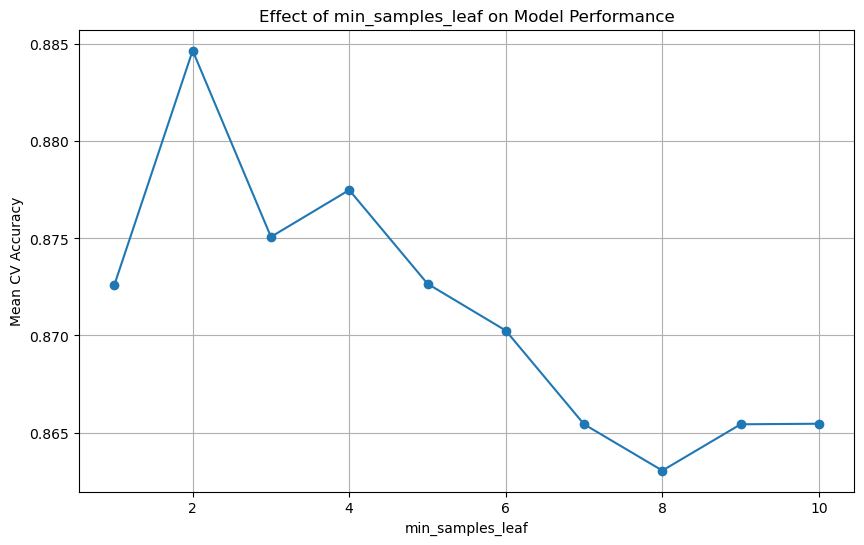

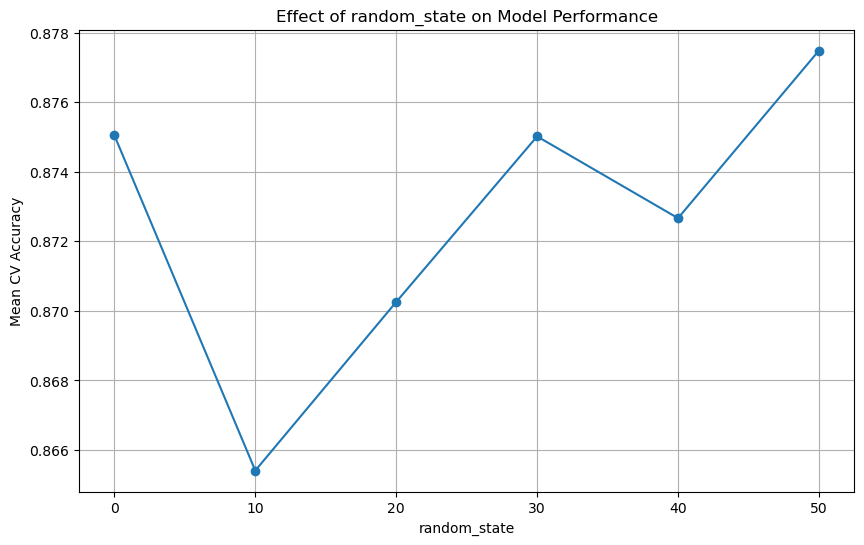

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('./data_reduced.csv')

# 언더샘플링
Training_data_0 = data[data['Bankrupt?'] == 0].sample(300, random_state=41)
Training_data_1 = data[data['Bankrupt?'] == 1]
Undersample_data = pd.concat([Training_data_0, Training_data_1]).sample(frac=1, random_state=41).reset_index(drop=True)

# 특성과 타겟 변수 분리
data_input = Undersample_data.drop(columns=['Bankrupt?'])
data_target = Undersample_data['Bankrupt?']

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, test_size=0.2, random_state=42)

# 하이퍼파라미터 값 범위 설정
n_estimators_range = list(range(50, 301, 25))
max_depth_range = list(range(3, 21, 2))
min_samples_split_range = list(range(2, 21, 2))
min_samples_leaf_range = list(range(1, 11, 1))
random_state_range = list(range(0, 51, 10))

def plot_hyperparameter_tuning(hyperparameter_name, param_range):
    cv_scores = []

    for param in param_range:
        if hyperparameter_name == 'n_estimators':
            model = RandomForestClassifier(n_estimators=param, n_jobs=-1, random_state=42)
        elif hyperparameter_name == 'max_depth':
            model = RandomForestClassifier(max_depth=param, n_jobs=-1, random_state=42)
        elif hyperparameter_name == 'min_samples_split':
            model = RandomForestClassifier(min_samples_split=param, n_jobs=-1, random_state=42)
        elif hyperparameter_name == 'min_samples_leaf':
            model = RandomForestClassifier(min_samples_leaf=param, n_jobs=-1, random_state=42)
        elif hyperparameter_name == 'random_state':
            model = RandomForestClassifier(random_state=param)
        
        scores = cross_val_score(model, train_input, train_target, cv=5, scoring='accuracy')
        cv_scores.append(np.mean(scores))

    # 성능 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(param_range, cv_scores, marker='o')
    plt.title(f'Effect of {hyperparameter_name} on Model Performance')
    plt.xlabel(hyperparameter_name)
    plt.ylabel('Mean CV Accuracy')
    plt.grid(True)
    plt.show()

# n_estimators 성능 시각화
plot_hyperparameter_tuning('n_estimators', n_estimators_range)

# max_depth 성능 시각화
plot_hyperparameter_tuning('max_depth', max_depth_range)

# min_samples_split 성능 시각화
plot_hyperparameter_tuning('min_samples_split', min_samples_split_range)

# min_samples_leaf 성능 시각화
plot_hyperparameter_tuning('min_samples_leaf', min_samples_leaf_range)

# random_state 성능 시각화
plot_hyperparameter_tuning('random_state', random_state_range)

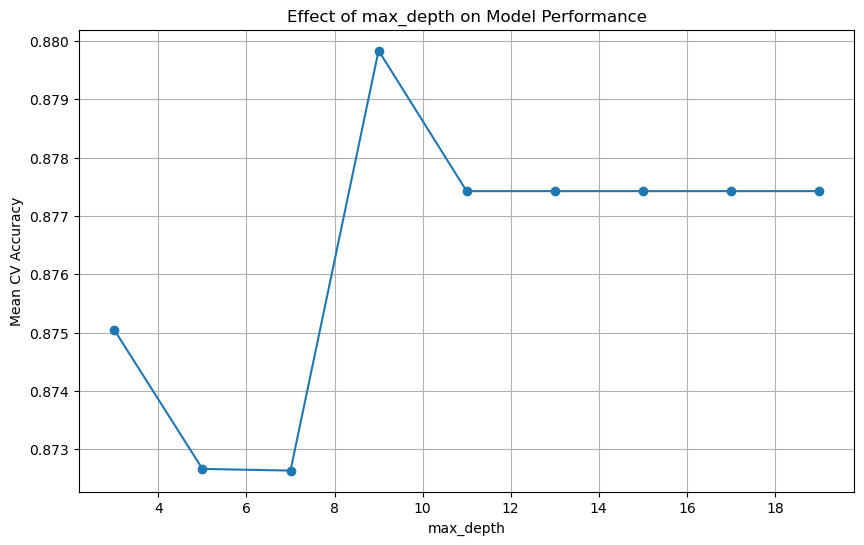

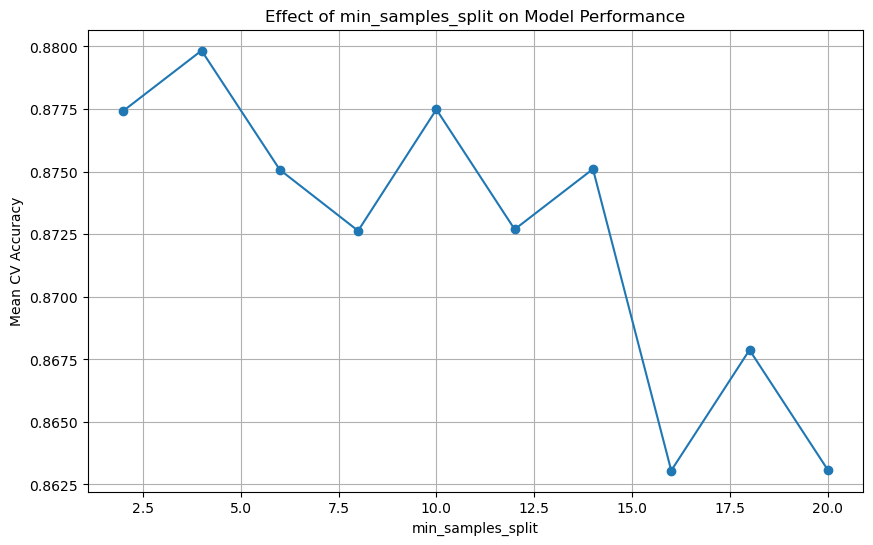

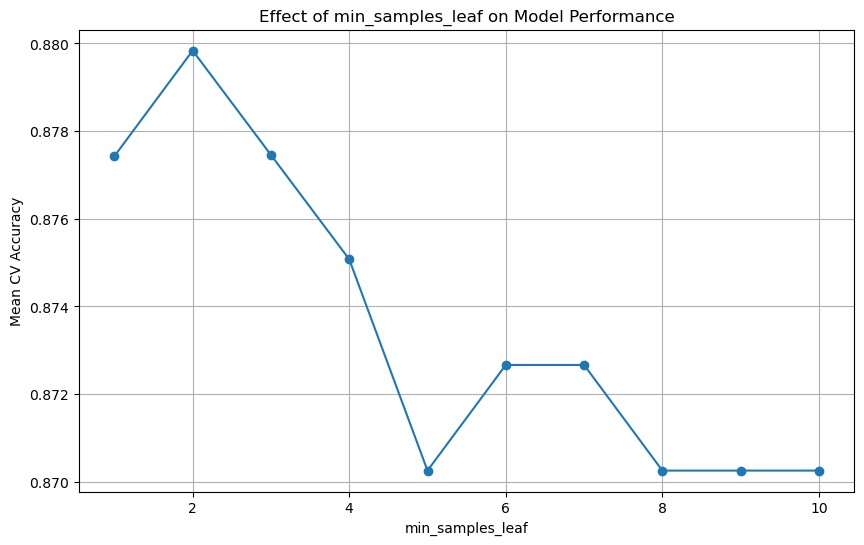

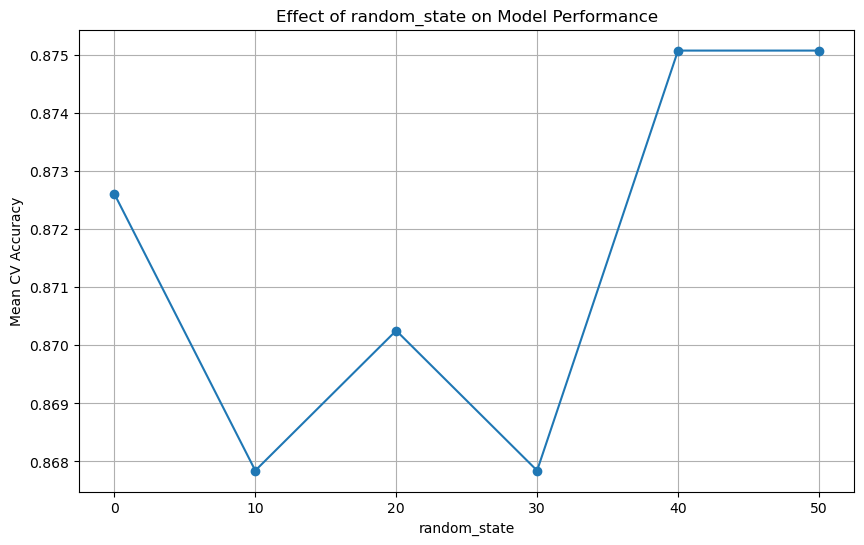

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('./data_reduced.csv')

# 언더샘플링
Training_data_0 = data[data['Bankrupt?'] == 0].sample(300, random_state=41)
Training_data_1 = data[data['Bankrupt?'] == 1]
Undersample_data = pd.concat([Training_data_0, Training_data_1]).sample(frac=1, random_state=41).reset_index(drop=True)

# 특성과 타겟 변수 분리
data_input = Undersample_data.drop(columns=['Bankrupt?'])
data_target = Undersample_data['Bankrupt?']

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, test_size=0.2, random_state=42)

# 하이퍼파라미터 값 범위 설정
max_depth_range = list(range(3, 21, 2))
min_samples_split_range = list(range(2, 21, 2))
min_samples_leaf_range = list(range(1, 11, 1))
random_state_range = list(range(0, 51, 10))

def plot_hyperparameter_tuning(hyperparameter_name, param_range):
    cv_scores = []

    for param in param_range:
        if hyperparameter_name == 'max_depth':
            model = RandomForestClassifier(n_estimators=175, max_depth=param, random_state=42)
        elif hyperparameter_name == 'min_samples_split':
            model = RandomForestClassifier(n_estimators=175, min_samples_split=param, random_state=42)
        elif hyperparameter_name == 'min_samples_leaf':
            model = RandomForestClassifier(n_estimators=175, min_samples_leaf=param, random_state=42)
        elif hyperparameter_name == 'random_state':
            model = RandomForestClassifier(n_estimators=175, random_state=param)
        
        scores = cross_val_score(model, train_input, train_target, cv=5, scoring='accuracy')
        cv_scores.append(np.mean(scores))

    # 성능 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(param_range, cv_scores, marker='o')
    plt.title(f'Effect of {hyperparameter_name} on Model Performance')
    plt.xlabel(hyperparameter_name) 
    plt.ylabel('Mean CV Accuracy')
    plt.grid(True)
    plt.show()

# max_depth 성능 시각화
plot_hyperparameter_tuning('max_depth', max_depth_range)

# min_samples_split 성능 시각화
plot_hyperparameter_tuning('min_samples_split', min_samples_split_range)

# min_samples_leaf 성능 시각화
plot_hyperparameter_tuning('min_samples_leaf', min_samples_leaf_range)

# random_state 성능 시각화
plot_hyperparameter_tuning('random_state', random_state_range)

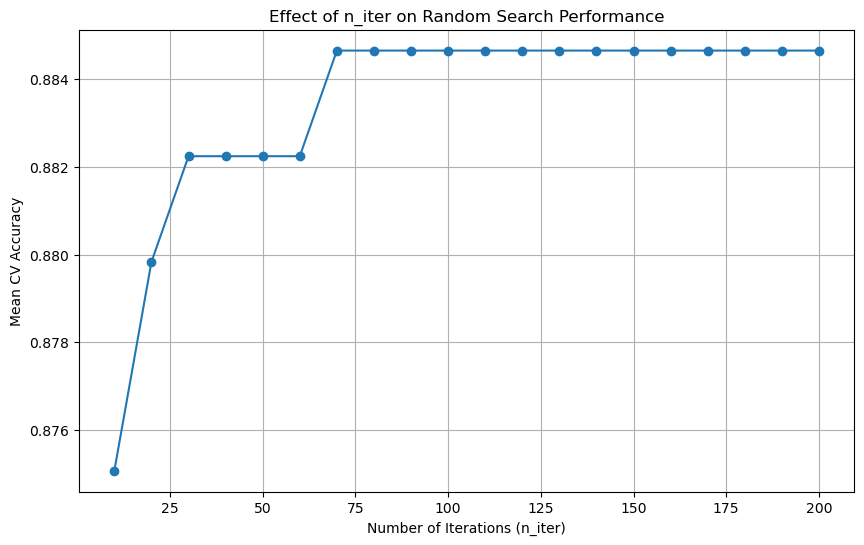

In [17]:
# 랜덤서치 그래프
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import  randint


# 하이퍼파라미터 튜닝 (랜덤 서치) 설정
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# n_iter 값 범위 설정
n_iter_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
best_test_scores = []

for n_iter in n_iter_range:
    random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                       param_distributions=param_dist,
                                       n_iter=n_iter,
                                       cv=5,
                                       n_jobs=-1,
                                       scoring='accuracy',
                                       random_state=42)
    # 랜덤 서치 수행
    random_search.fit(train_input, train_target)
    best_test_scores.append(random_search.best_score_)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(n_iter_range, best_test_scores, marker='o')
plt.title('Effect of n_iter on Random Search Performance')
plt.xlabel('Number of Iterations (n_iter)')
plt.ylabel('Best CV Accuracy')
plt.grid(True)
plt.show()

Best n_estimators: 175 with CV Accuracy: 0.8774239816408491
Best max_depth: 9 with CV Accuracy: 0.879833620195066
Best min_samples_split: 4 with CV Accuracy: 0.879833620195066
Best min_samples_leaf: 2 with CV Accuracy: 0.879833620195066
Best random_state: 9 with CV Accuracy: 0.8798623063683305


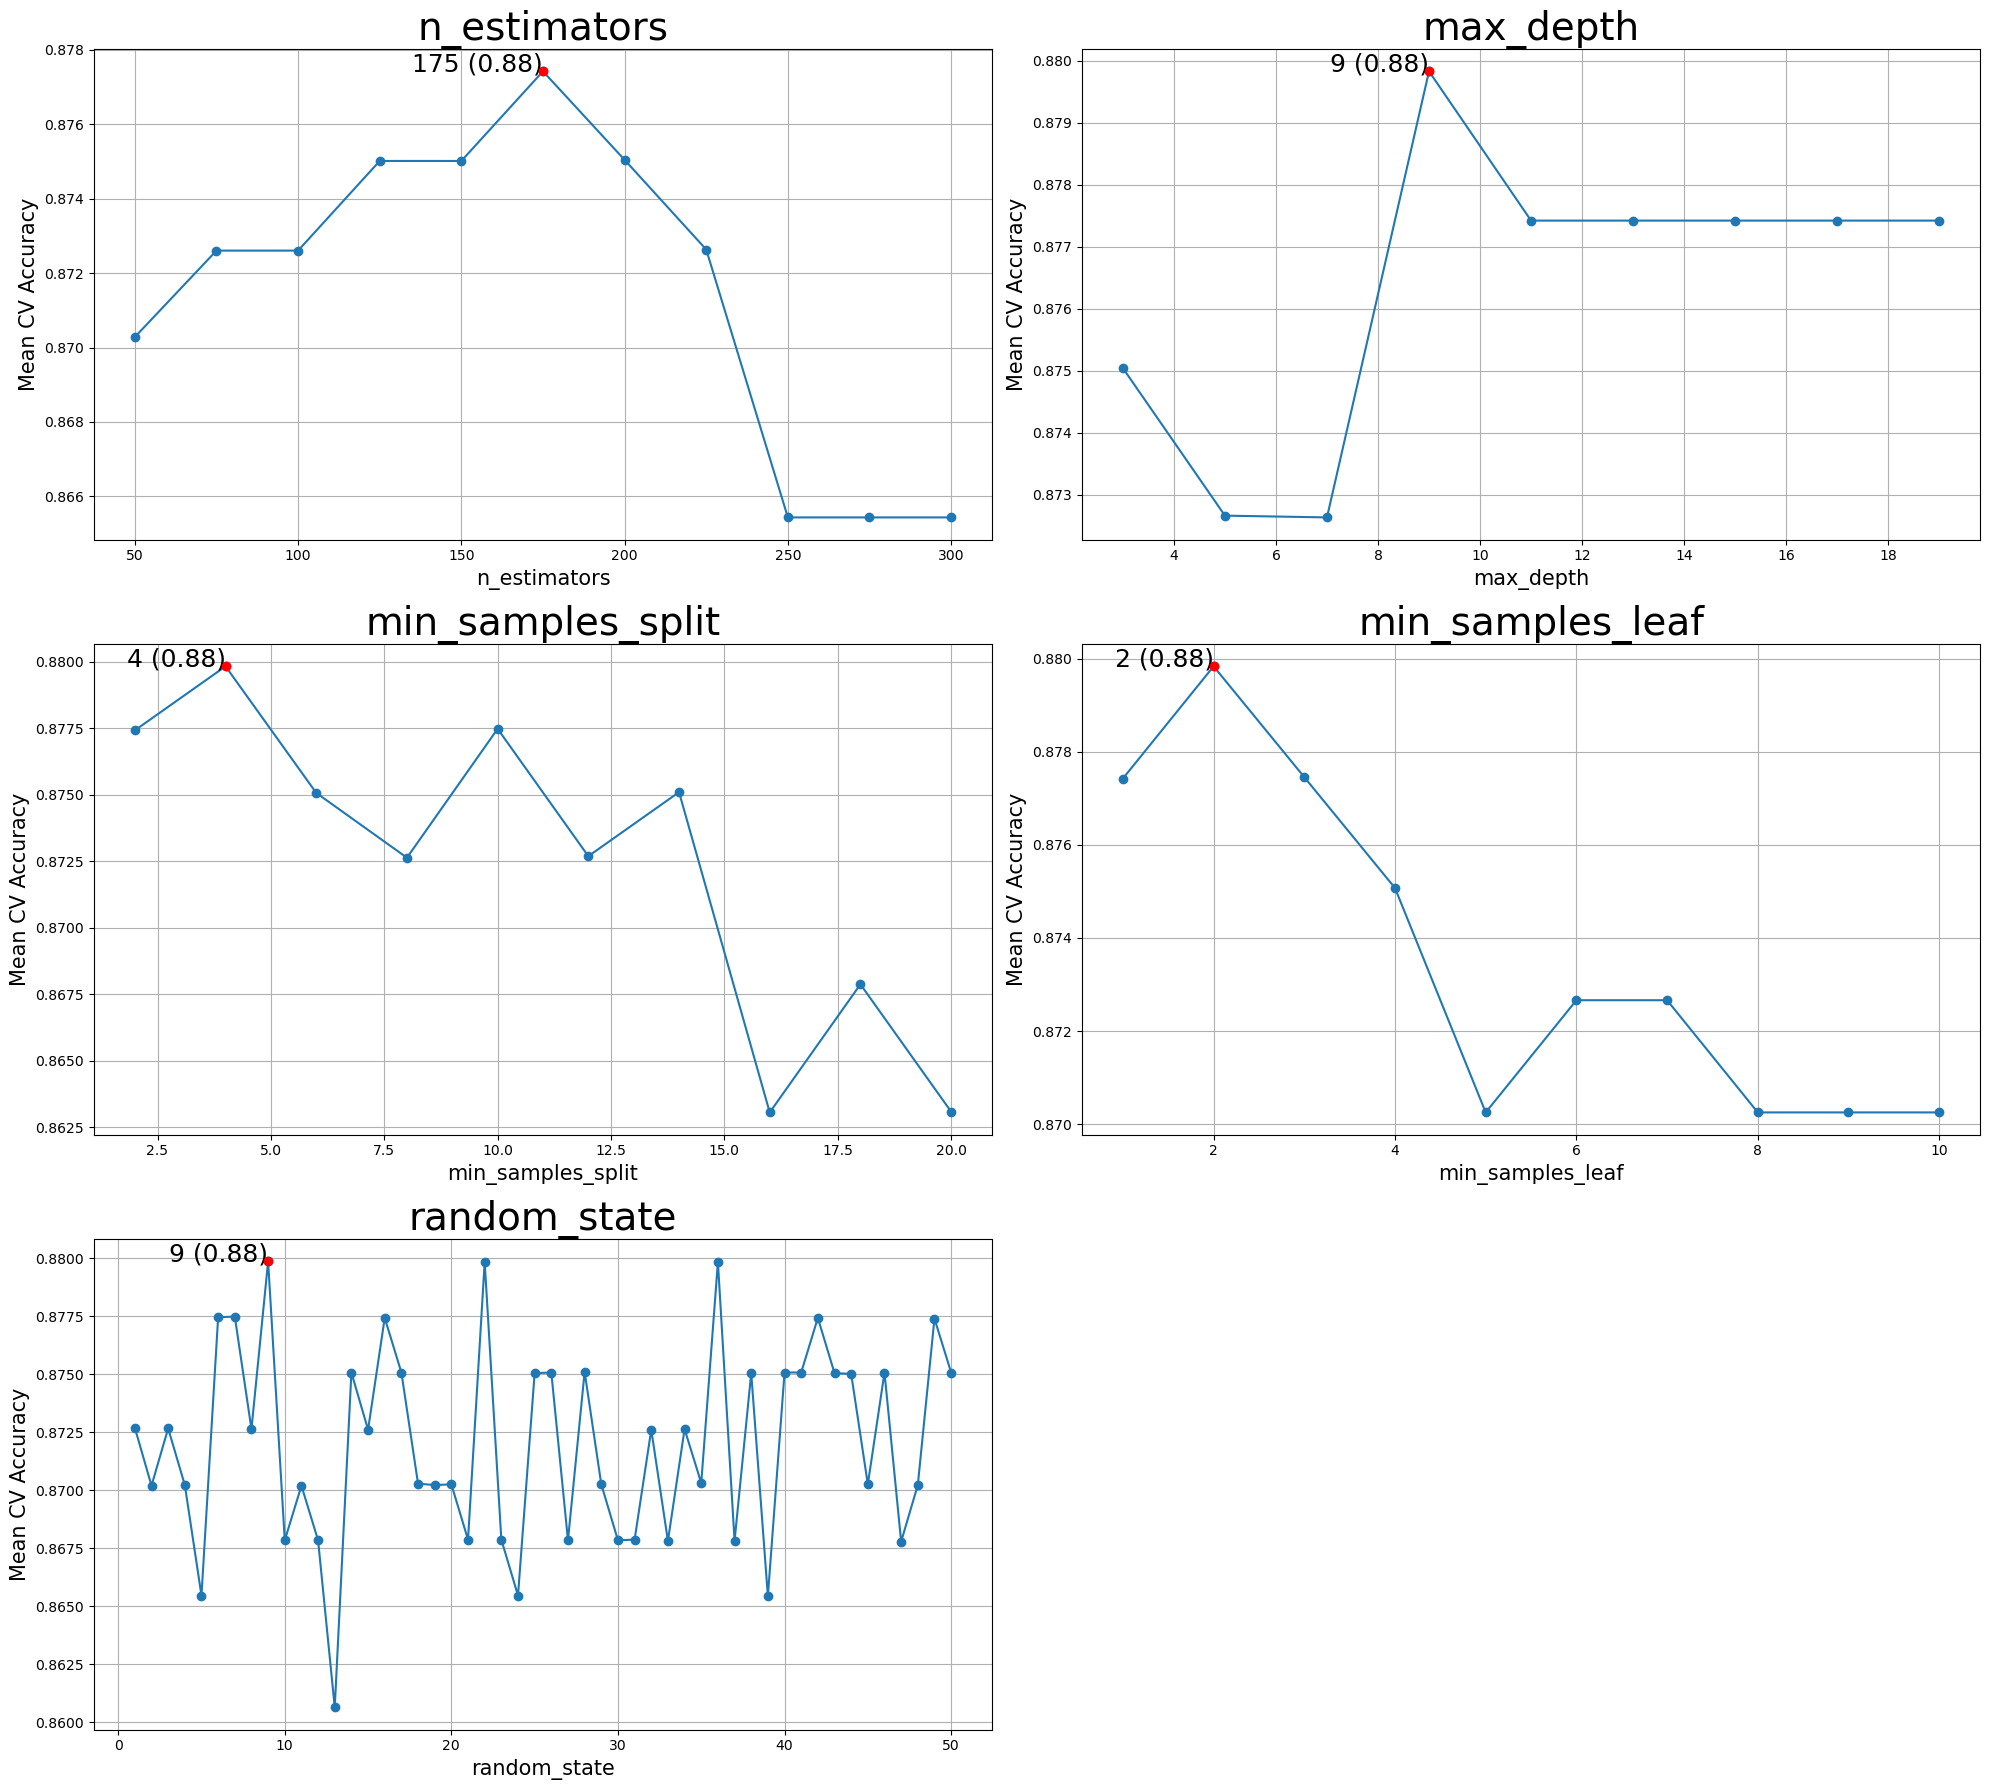

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# 하이퍼파라미터 값 범위 설정
max_depth_range = list(range(3, 21, 2))
min_samples_split_range = list(range(2, 21, 2))
min_samples_leaf_range = list(range(1, 11, 1))
random_state_range = list(range(1, 51, 1))
n_estimators_range = list(range(50, 301, 25))

def plot_hyperparameter_tuning(hyperparameter_name, param_range, ax):
    cv_scores = []
    best_score = 0
    best_param = None
        
    for param in param_range:
        if hyperparameter_name == 'n_estimators':
            model = RandomForestClassifier(n_estimators=param, n_jobs=-1, random_state=42)
        elif hyperparameter_name == 'max_depth':
            model = RandomForestClassifier(n_estimators=175, max_depth=param, random_state=42)
        elif hyperparameter_name == 'min_samples_split':
            model = RandomForestClassifier(n_estimators=175, min_samples_split=param, random_state=42)
        elif hyperparameter_name == 'min_samples_leaf':
            model = RandomForestClassifier(n_estimators=175, min_samples_leaf=param, random_state=42)
        elif hyperparameter_name == 'random_state':
            model = RandomForestClassifier(n_estimators=175, random_state=param)
        
        scores = cross_val_score(model, train_input, train_target, cv=5, scoring='accuracy')
        mean_score = np.mean(scores)
        cv_scores.append(mean_score)

        if mean_score > best_score:
            best_score = mean_score
            best_param = param

    # 성능 시각화
    ax.plot(param_range, cv_scores, marker='o', label='Mean CV Accuracy')
    ax.scatter([best_param], [best_score], color='red', zorder=5)
    ax.text(best_param, best_score, f'{best_param} ({best_score:.2f})', fontsize=18, ha='right')
    ax.set_title(f'{hyperparameter_name}', fontsize=28)
    ax.set_xlabel(hyperparameter_name, fontsize=15)
    ax.set_ylabel('Mean CV Accuracy', fontsize=15)
    ax.grid(True)
    
    print(f'Best {hyperparameter_name}: {best_param} with CV Accuracy: {best_score}')

# subplot 설정
fig, axs = plt.subplots(3, 2, figsize=(20, 18))

plot_hyperparameter_tuning('n_estimators', n_estimators_range, axs[0, 0])
plot_hyperparameter_tuning('max_depth', max_depth_range, axs[0, 1])
plot_hyperparameter_tuning('min_samples_split', min_samples_split_range, axs[1, 0])
plot_hyperparameter_tuning('min_samples_leaf', min_samples_leaf_range, axs[1, 1])
plot_hyperparameter_tuning('random_state', random_state_range, axs[2, 0])

# 남는 subplot 제거
fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.show()


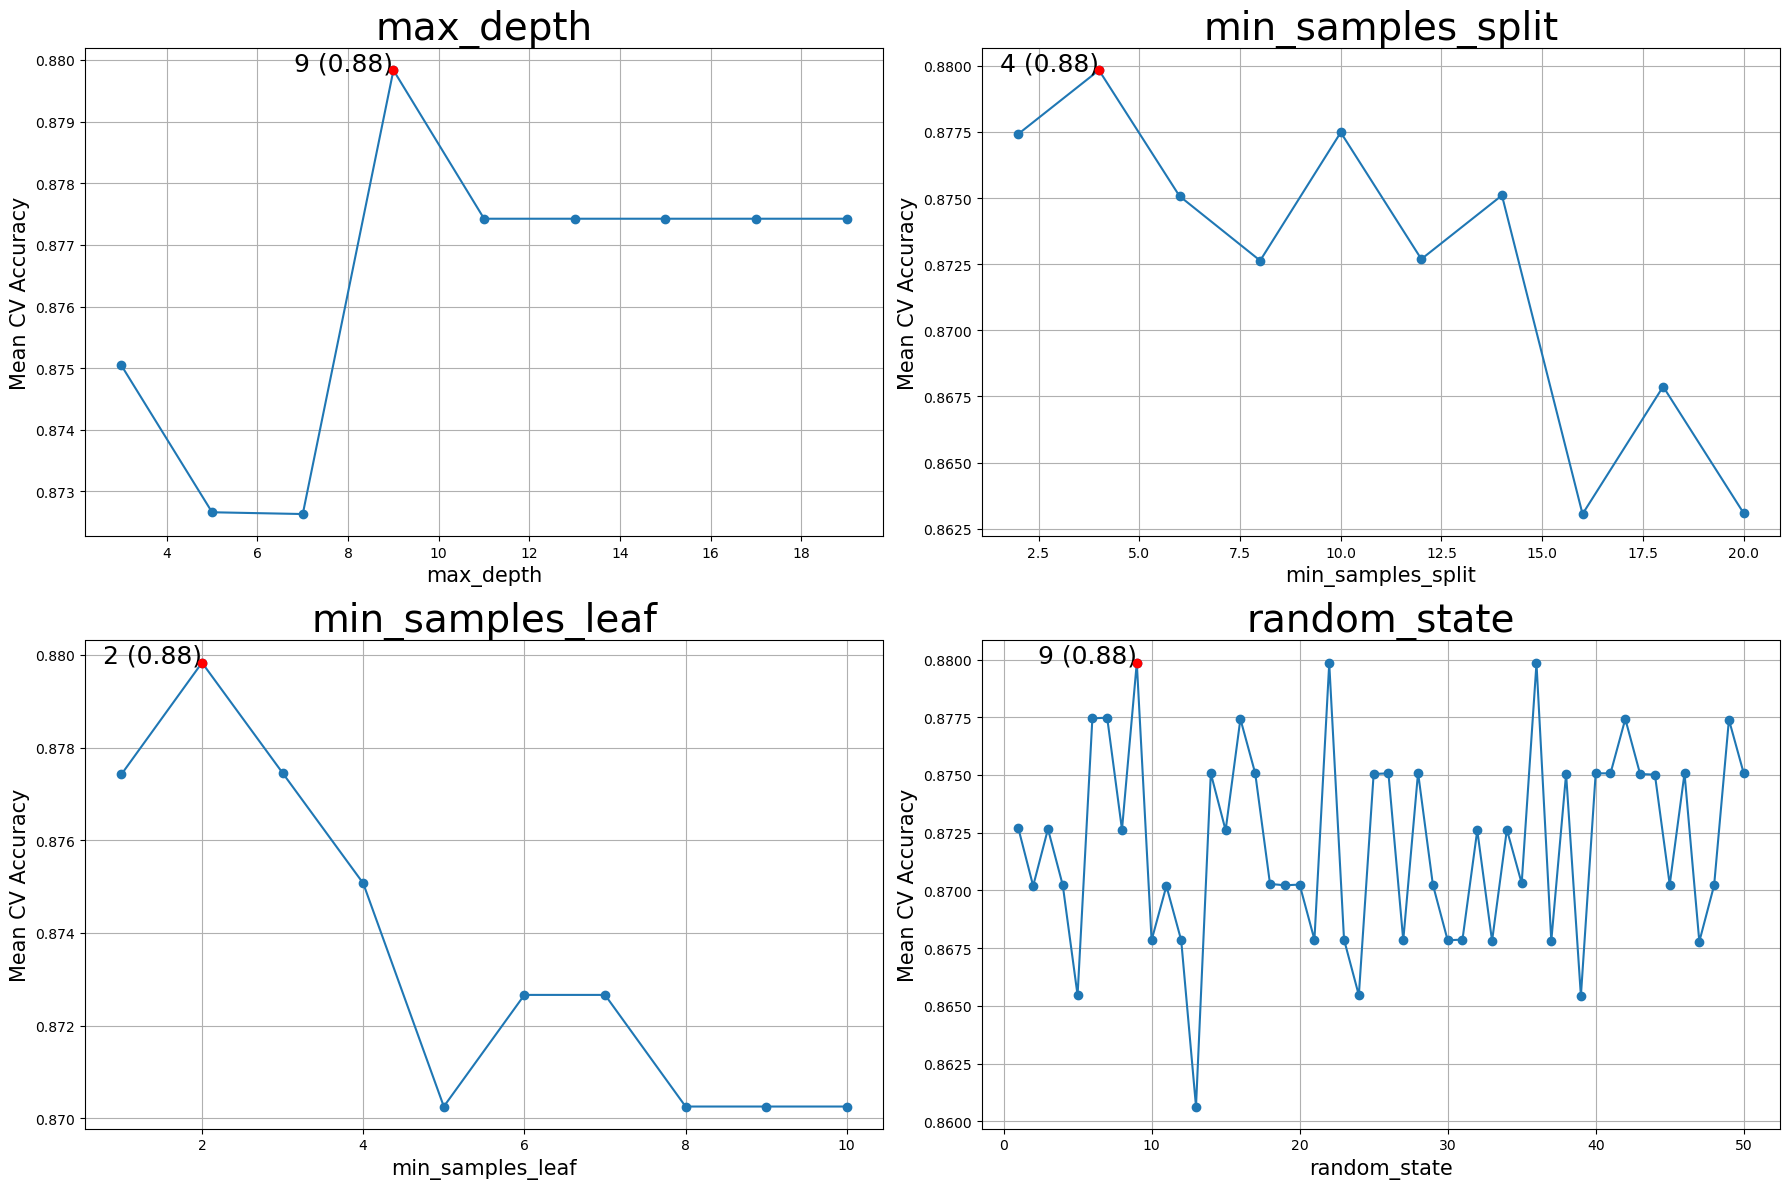

In [18]:
# 하이퍼파라미터 값 범위 설정
max_depth_range = list(range(3, 21, 2))
min_samples_split_range = list(range(2, 21, 2))
min_samples_leaf_range = list(range(1, 11, 1))
random_state_range = list(range(1, 51, 1))

def plot_hyperparameter_tuning(ax, hyperparameter_name, param_range):
    cv_scores = []
    best_score = 0
    best_param = None

    for param in param_range:
        if hyperparameter_name == 'max_depth':
            model = RandomForestClassifier(n_estimators=175, max_depth=param, random_state=42)
        elif hyperparameter_name == 'min_samples_split':
            model = RandomForestClassifier(n_estimators=175, min_samples_split=param, random_state=42)
        elif hyperparameter_name == 'min_samples_leaf':
            model = RandomForestClassifier(n_estimators=175, min_samples_leaf=param, random_state=42)
        elif hyperparameter_name == 'random_state':
            model = RandomForestClassifier(n_estimators=175, random_state=param)
        
        scores = cross_val_score(model, train_input, train_target, cv=5, scoring='accuracy')
        mean_score = np.mean(scores)
        cv_scores.append(mean_score)

        if mean_score > best_score:
            best_score = mean_score
            best_param = param

    # 성능 시각화
    ax.plot(param_range, cv_scores, marker='o', label='Mean CV Accuracy')
    ax.scatter([best_param], [best_score], color='red', zorder=5)
    ax.text(best_param, best_score, f'{best_param} ({best_score:.2f})', fontsize=18, ha='right')
    ax.set_title(f'{hyperparameter_name}', fontsize=28)
    ax.set_xlabel(hyperparameter_name, fontsize=15)
    ax.set_ylabel('Mean CV Accuracy', fontsize=15)
    ax.grid(True)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# max_depth 성능 시각화 및 출력
plot_hyperparameter_tuning(axes[0, 0], 'max_depth', max_depth_range)

# min_samples_split 성능 시각화 및 출력
plot_hyperparameter_tuning(axes[0, 1], 'min_samples_split', min_samples_split_range)

# min_samples_leaf 성능 시각화 및 출력
plot_hyperparameter_tuning(axes[1, 0], 'min_samples_leaf', min_samples_leaf_range)

# random_state 성능 시각화 및 출력
plot_hyperparameter_tuning(axes[1, 1], 'random_state', random_state_range)

plt.tight_layout()
plt.show()

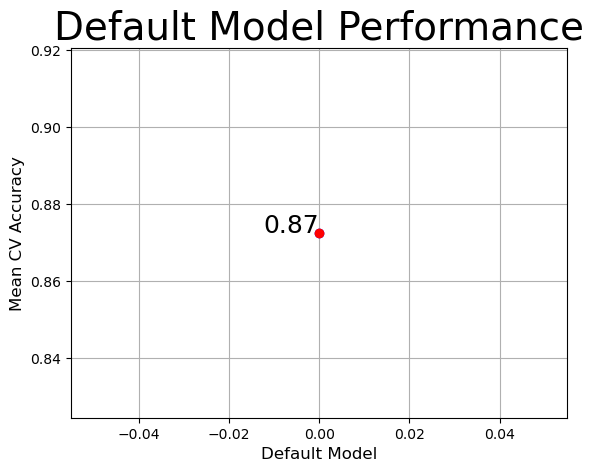

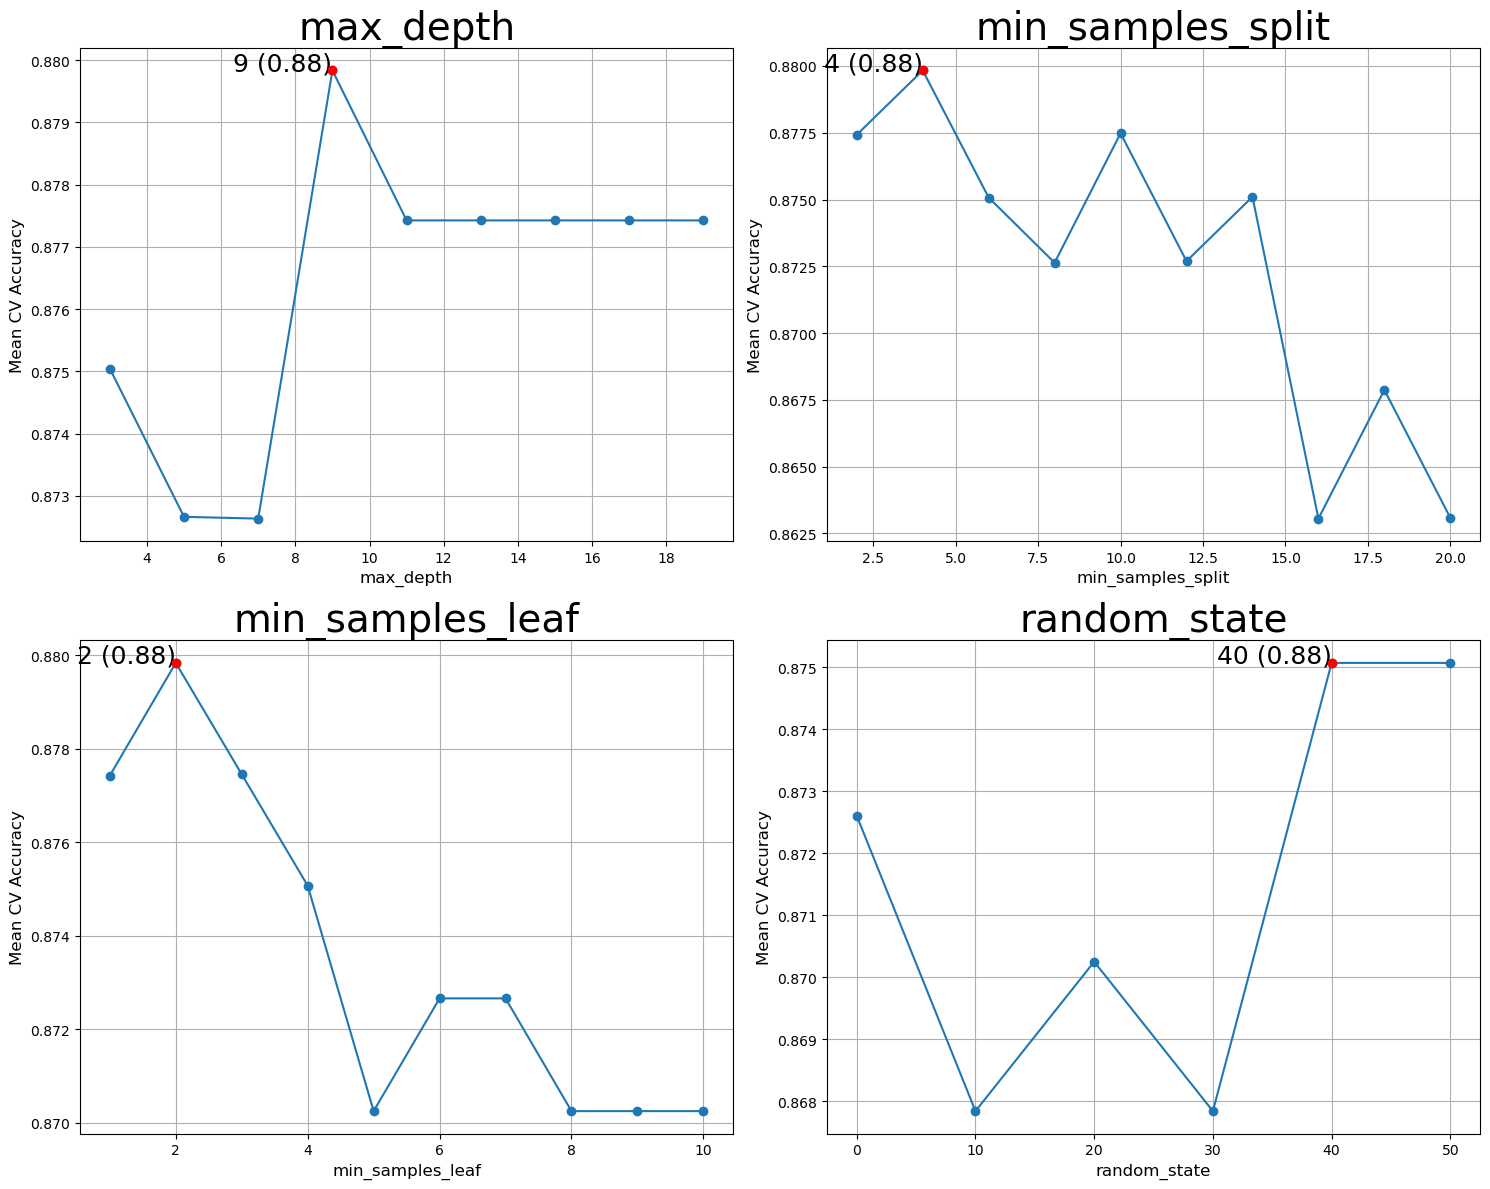

In [14]:
# 기본 모델 학습 및 성능 평가
default_model = RandomForestClassifier(random_state=42)
default_model.fit(train_input, train_target)

default_train_predictions = default_model.predict(train_input)
default_test_predictions = default_model.predict(test_input)

default_train_accuracy = accuracy_score(train_target, default_train_predictions)
default_test_accuracy = accuracy_score(test_target, default_test_predictions)

# 하이퍼파라미터 값 범위 설정
max_depth_range = list(range(3, 21, 2))
min_samples_split_range = list(range(2, 21, 2))
min_samples_leaf_range = list(range(1, 11, 1))
random_state_range = list(range(0, 51, 10))

# 기본 모델 성능 시각화
default_model_scores = cross_val_score(default_model, train_input, train_target, cv=5, scoring='accuracy')
plt.plot([0], [np.mean(default_model_scores)], marker='o', color='blue', label='Default Model Accuracy')
plt.scatter([0], [np.mean(default_model_scores)], color='red', zorder=5)
plt.text(0, np.mean(default_model_scores), f'{np.mean(default_model_scores):.2f}', fontsize=18, ha='right')
plt.title('Default Model Performance', fontsize=28)
plt.xlabel('Default Model', fontsize=12)
plt.ylabel('Mean CV Accuracy', fontsize=12)
plt.grid(True)

def plot_hyperparameter_tuning(ax, hyperparameter_name, param_range):
    cv_scores = []
    best_score = 0
    best_param = None

    for param in param_range:
        if hyperparameter_name == 'max_depth':
            model = RandomForestClassifier(n_estimators=175, max_depth=param, random_state=42)
        elif hyperparameter_name == 'min_samples_split':
            model = RandomForestClassifier(n_estimators=175, min_samples_split=param, random_state=42)
        elif hyperparameter_name == 'min_samples_leaf':
            model = RandomForestClassifier(n_estimators=175, min_samples_leaf=param, random_state=42)
        elif hyperparameter_name == 'random_state':
            model = RandomForestClassifier(n_estimators=175, random_state=param)
        
        scores = cross_val_score(model, train_input, train_target, cv=5, scoring='accuracy')
        mean_score = np.mean(scores)
        cv_scores.append(mean_score)

        if mean_score > best_score:
            best_score = mean_score
            best_param = param

    # 성능 시각화
    ax.plot(param_range, cv_scores, marker='o', label='Mean CV Accuracy')
    ax.scatter([best_param], [best_score], color='red', zorder=5)
    ax.text(best_param, best_score, f'{best_param} ({best_score:.2f})', fontsize=18, ha='right')
    ax.set_title(f'{hyperparameter_name}', fontsize=28)
    ax.set_xlabel(hyperparameter_name, fontsize=15)
    ax.set_ylabel('Mean CV Accuracy', fontsize=15)
    ax.grid(True)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# max_depth 성능 시각화 및 출력
plot_hyperparameter_tuning(axes[0, 0], 'max_depth', max_depth_range)

# min_samples_split 성능 시각화 및 출력
plot_hyperparameter_tuning(axes[0, 1], 'min_samples_split', min_samples_split_range)

# min_samples_leaf 성능 시각화 및 출력
plot_hyperparameter_tuning(axes[1, 0], 'min_samples_leaf', min_samples_leaf_range)

# random_state 성능 시각화 및 출력
plot_hyperparameter_tuning(axes[1, 1], 'random_state', random_state_range)

plt.tight_layout()
plt.show()